In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as connection
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import sqlite3
import random

In [2]:
# try:
#     mydb = connection.connect(host="localhost", database='data', user="root", passwd="",use_pure=True)
#     query = "Select * from history;"
#     data = pd.read_sql(query,mydb)
#     mydb.close() #close the connection
# except Exception as e:
#     mydb.close()
#     print(str(e))

try:
    db = sqlite3.connect('data.db')
    query = "Select * from history;"
    data = pd.read_sql_query(query, db)

except sqlite3.Error as error:
    print("Error while connecting to sqlite", error)

In [17]:
print(data.shape[0])
data.head(10)

83067


,ID,ct_bets_money,bonus_bets_money,t_bets_money,ct_bets_players,bonus_bets_players,t_bets_players,winner,site_win,site_loss,date_added,green_bet
0,6753,694.10,208.65,76.34,20 Bets Total,39 Bets Total,23 Bets Total,coin-t,902.75,152.68,2023-03-14 08:53:37,4
1,6754,87.82,148.88,597.95,27 Bets Total,29 Bets Total,22 Bets Total,coin-ct,746.83,175.64,2023-03-14 08:54:06,4
2,6755,20.67,132.96,148.22,18 Bets Total,41 Bets Total,23 Bets Total,coin-ct,281.18,41.34,2023-03-14 08:54:35,4
3,6756,337.83,130.15,645.33,21 Bets Total,38 Bets Total,20 Bets Total,coin-ct,775.48,675.66,2023-03-14 08:55:04,4
4,6757,116.31,227.71,1472.92,23 Bets Total,39 Bets Total,24 Bets Total,coin-t,344.02,2945.84,2023-03-14 08:55:33,4
5,6758,90.96,224.86,482.79,21 Bets Total,43 Bets Total,29 Bets Total,coin-t,315.82,965.58,2023-03-14 08:56:02,4
6,6759,63.91,158.50,205.20,20 Bets Total,39 Bets Total,24 Bets Total,coin-t,222.41,410.40,2023-03-14 08:56:31,4
7,6760,214.76,132.14,41.91,25 Bets Total,37 Bets Total,19 Bets Total,coin-t,346.90,83.82,2023-03-14 08:57:00,4
8,6761,718.72,252.39,675.83,33 Bets Total,38 Bets Total,25 Bets Total,coin-t,971.11,1351.66,2023-03-14 08:57:29,4
9,6762,565.60,311.75,138.94,34 Bets Total,47 Bets Total,19 Bets Total,coin-t,877.35,277.88,2023-03-14 08:57:58,4


In [16]:
#TEST MOJEJ TAKTIKY

def max(value, max):
    if value > max:
        return value
    else:
        return max

bet = 1
bet_count = 1
win = 0
count = 1
max_bet = 1
dist = 0
max_dist = 0
for index, row in data.iterrows():
    dist = dist + 1
    data['green_bet'] = bet_count
    print(bet_count)
    
    if row['winner'] == "coin-bonus":
        win = win + (bet_count * 14)
        bet_count = 1
        count = 1
        max_dist = max(dist, max_dist)
        dist = 0
        continue
    else:
        count = count + 1
            
    if (bet_count == 1 and count == 14) or (bet_count > 1 and count == 8):
        bet_count = bet_count * 2
        count = 1
        max_bet = max(bet_count, max_bet)
        continue
        
# print(max_bet, win, max_dist)
# data.head(10)
        
        

1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
256
256
256
256
256
256
256
512
512
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1


32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4

1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
256
256
256
256
256
256
256
512
512
512
512
512
512
512
1024
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
1
1
1
1
1
1
1
1
1
1


4
4
4
4
4
4
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
3

1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2


4
4
4
4
4
4
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
256
256
256
256
256
256
256
512
512
512
512
512
512
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
256
256
256
256
256
256
256
512
512
512
512
512
512
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4

4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1


4
8
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2

1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
256
256
256
256
256
256
256
512
512
512
512
512
512
512
1024
1024
1024
1024
1024
1024
1024
2048
2048
2048
2048
2048
2048
2048
4096
4096
4096
4096
4096
4096
4096
8192
8192
8192
8192
8192
8192
8192
16384
16384
16384
16384
16384
16384
16384
32768
32768
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8

1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
256
256
256
256
256
256
256
512
512
512
512
512
512
512
1024
1024
1024
1024
1024
1024
1024
2048
2048
2048
2048
2048
2048
2048
4096
4096
4096
4096
4096
4096
4096
8192
8192
8192
8192
8192
8192
8192
16384
16384
16384
16384
16384
16384
1
1
1
1
1

16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
256
256
256
256
256
256
256
512
512
512
512
512
512
512
1024
1024
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
256
256
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
256
256
256
25

1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
64
64
64
64
64
64
128
128
128
128
128
128
128
256
256
256
256
256
256
256
512
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
16
16
16
16
16
32
32
32
32
32
32
32
64
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
4
4
4
4
4
4
4
8
8
8
8
8
8
8
16
16
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

In [19]:
# plot site_total win
plt.plot(data['date_added'], data['green_bet'], label="bez")
plt.xlabel("time")
plt.ylabel("site green_bet")
plt.legend()
plt.xticks(rotation=45)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()


KeyboardInterrupt



In [214]:
#testovacia ruleta

def spin_roulette():
    random_number = random.random()

    if random_number < 7/15:
        return 0.0  # Čierna
    elif random_number < 14/15:
        return 1.0  # Červená
    else:
        return 0.5  # Zelená

# Testovanie rulety
num_spins = 1000000
results = [spin_roulette() for _ in range(num_spins)]

black_count = results.count(0.0)
red_count = results.count(1.0)
green_count = results.count(0.5)

print(f"Čierna: {black_count} ({black_count / num_spins * 100:.2f}%)")
print(f"Červená: {red_count} ({red_count / num_spins * 100:.2f}%)")
print(f"Zelená: {green_count} ({green_count / num_spins * 100:.2f}%)")


Čierna: 467676 (46.77%)
Červená: 465876 (46.59%)
Zelená: 66448 (6.64%)


In [218]:
# copy original dataframe pre testovaciu ruletu
data_copy = data.copy()

data_copy['winner'] = data_copy.apply(lambda row: spin_roulette(), axis=1)

In [219]:
def calculate_site_win(row):
    if row['winner'] == 0.0:  # Čierna
        return row['ct_bets_money'] + row['bonus_bets_money']
    elif row['winner'] == 1.0:  # Červená
        return row['t_bets_money'] + row['bonus_bets_money']
    else:  # Zelená
        return row['ct_bets_money'] + row['t_bets_money']
    
def calculate_site_loss(row):
    if row['winner'] == 0.0:  # Čierna
        return row['t_bets_money']
    elif row['winner'] == 1.0:  # Červená
        return row['ct_bets_money']
    else:  # Zelená
        return row['bonus_bets_money'] * 13

data_copy['site_loss'] = data_copy.apply(calculate_site_loss, axis=1)
data_copy['site_win'] = data_copy.apply(calculate_site_win, axis=1)

site_total = site_total_calculation(data_copy)
data_copy['site_total'] = site_total

data_copy["date_added"] = pd.to_datetime(data_copy["date_added"]) 
data_copy.tail(5)

,ID,ct_bets_money,bonus_bets_money,t_bets_money,ct_bets_players,bonus_bets_players,t_bets_players,winner,site_win,site_loss,date_added,site_total
62934,69687,121.79,361.77,620.52,16,44,44,0.0,483.56,620.52,2023-04-04 16:56:04,3231672.73
62935,69688,682.48,409.05,107.45,15,56,33,0.0,1091.53,107.45,2023-04-04 16:56:33,3232656.81
62936,69689,368.01,623.92,396.18,12,65,44,0.0,991.93,396.18,2023-04-04 16:57:02,3233252.56
62937,69690,49.82,466.53,201.05,24,48,40,0.0,516.35,201.05,2023-04-04 16:57:31,3233567.86
62938,69691,112.39,228.53,270.48,27,45,32,1.0,499.01,112.39,2023-04-04 16:58:00,3233954.48


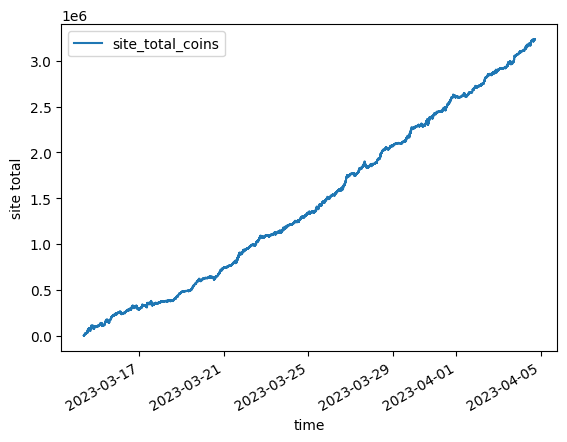

In [220]:
# plot site_total win
plt.plot(data_copy['date_added'], data_copy['site_total'], label="site_total_coins")
plt.xlabel("time")
plt.ylabel("site total")
plt.legend()
plt.xticks(rotation=45)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [191]:
# Odstránenie reťazca a prevod na integerové hodnoty
data["ct_bets_players"] = data["ct_bets_players"].str.extract('(\d+)').astype(int)
data["bonus_bets_players"] = data["bonus_bets_players"].str.extract('(\d+)').astype(int)
data["t_bets_players"] = data["t_bets_players"].str.extract('(\d+)').astype(int)

In [192]:
# convert object to datetime64[ns]
data["date_added"] = pd.to_datetime(data["date_added"]) 

In [193]:
def calculation_loss_correction(winner, ct, bonus, t):
    if(winner == "coin-bonus"):
        return bonus * 13
    else:
        if(winner == "coin-ct"):
            return ct
        else:
            return t
    

# calculate site_loss cause in parser is bad calculation
data['site_loss'] = data.apply(lambda row : calculation_loss_correction(row['winner'], row['ct_bets_money'], row['bonus_bets_money'], row['t_bets_money']), axis = 1)

In [194]:
def site_total_calculation(data):
    first = 1
    val = 0
    site_total = []
    for index, row in data.iterrows():
        if(first):
            first = 0
            val = row["site_win"] - row["site_loss"]
            site_total.append(round(val, 2))
        else:
            val = val + (row["site_win"] - row["site_loss"])
            site_total.append(round(val, 2))
    return site_total
            
    
    
# create new column site_total for graph
site_total = site_total_calculation(data)
data['site_total'] = site_total

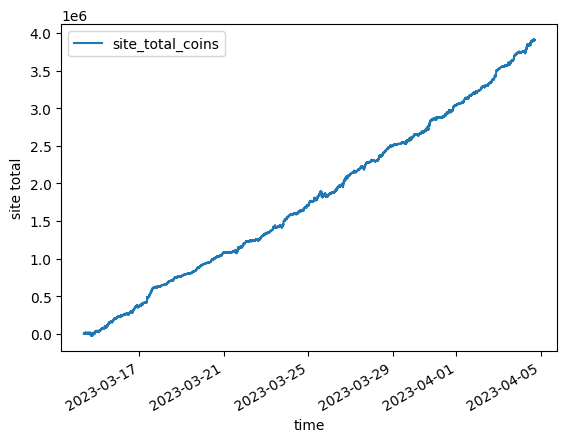

In [195]:
import matplotlib.dates as mdates

# plot site_total win
plt.plot(data['date_added'], data['site_total'], label="site_total_coins")
plt.xlabel("time")
plt.ylabel("site total")
plt.legend()
plt.xticks(rotation=45)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [156]:
# replacing values
data['winner'] = data['winner'].astype('str')
data['winner'].replace(to_replace = ['coin-t', 'coin-bonus', 'coin-ct'], value =[0,0.5,1], inplace=True)

In [157]:
total_win = data['site_win'].sum()
total_loss = data['site_loss'].sum()
data['site_win_std'] = data.rolling(window=20, on='ID')['site_win'].std()
data['site_win_mean'] = data.rolling(window=20, on='ID')['site_win'].mean()
data['site_loss_std'] = data.rolling(window=20, on='ID')['site_loss'].std()
data['site_loss_mean'] = data.rolling(window=20, on='ID')['site_loss'].mean()

data.dropna(inplace=True)
print(total_win, total_loss)
data.tail(10)

35190933.269999996 31283857.29


,ID,ct_bets_money,bonus_bets_money,t_bets_money,ct_bets_players,bonus_bets_players,t_bets_players,winner,site_win,site_loss,date_added,site_total,site_win_std,site_win_mean,site_loss_std,site_loss_mean
62929,69682,141.80,288.95,871.63,23,53,41,0.0,430.75,871.63,2023-04-04 16:53:39,3908791.34,315.492001,733.7745,1277.788868,818.8385
62930,69683,239.13,315.96,136.73,35,50,27,1.0,452.69,239.13,2023-04-04 16:54:08,3909004.90,318.650202,729.8000,1283.102078,803.3375
62931,69684,61.62,346.63,833.56,16,53,47,1.0,1180.19,61.62,2023-04-04 16:54:37,3910123.47,334.010253,748.7030,1293.131765,776.8830
62932,69685,140.60,354.51,713.17,29,48,37,1.0,1067.68,140.60,2023-04-04 16:55:06,3911050.55,339.437768,755.8075,1300.946806,745.6160
62933,69686,197.40,386.59,875.37,28,49,36,0.0,583.99,875.37,2023-04-04 16:55:35,3910759.17,339.834808,740.2270,1296.569271,775.3015
62934,69687,121.79,361.77,620.52,16,44,44,0.0,483.56,620.52,2023-04-04 16:56:04,3910622.21,337.645548,742.7180,1286.990148,802.1930
62935,69688,682.48,409.05,107.45,15,56,33,0.5,789.93,5317.65,2023-04-04 16:56:33,3906094.49,335.788299,752.8170,1624.008270,1060.2625
62936,69689,368.01,623.92,396.18,12,65,44,0.0,991.93,396.18,2023-04-04 16:57:02,3906690.24,337.357211,755.1550,1628.416772,1047.3845
62937,69690,49.82,466.53,201.05,24,48,40,0.0,516.35,201.05,2023-04-04 16:57:31,3907005.54,309.249657,712.9370,1422.700003,833.8240
62938,69691,112.39,228.53,270.48,27,45,32,0.0,340.92,270.48,2023-04-04 16:58:00,3907075.98,292.523216,667.4880,1417.963178,843.4445


In [158]:
# update table in database
# data.to_sql('history', db, if_exists='replace', index=False)

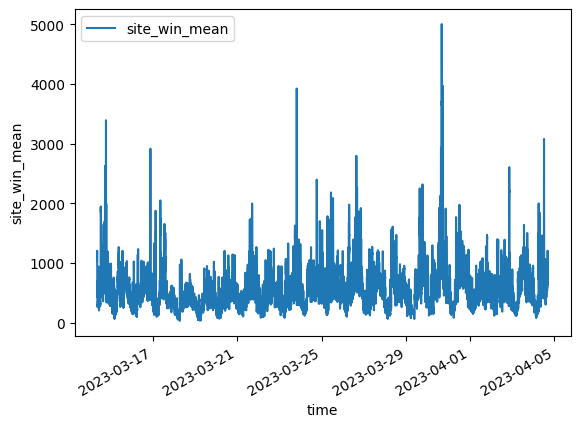

In [159]:
# plot site_win_mean
plt.plot(data['date_added'], data['site_win_mean'], label="site_win_mean")
plt.xlabel("time")
plt.ylabel("site_win_mean")
plt.legend()
plt.xticks(rotation=45)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

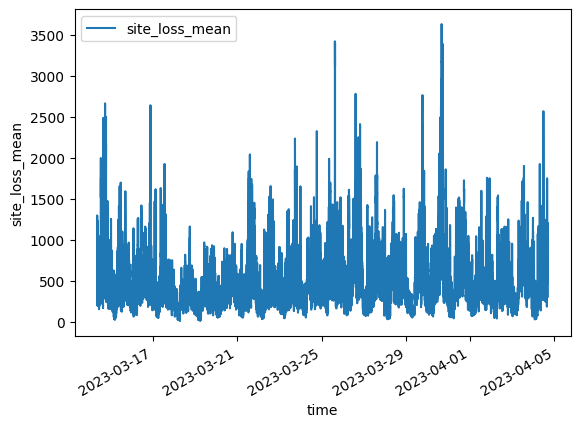

In [160]:
# plot site_loss_mean
plt.plot(data['date_added'], data['site_loss_mean'], label="site_loss_mean")
plt.xlabel("time")
plt.ylabel("site_loss_mean")
plt.legend()
plt.xticks(rotation=45)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

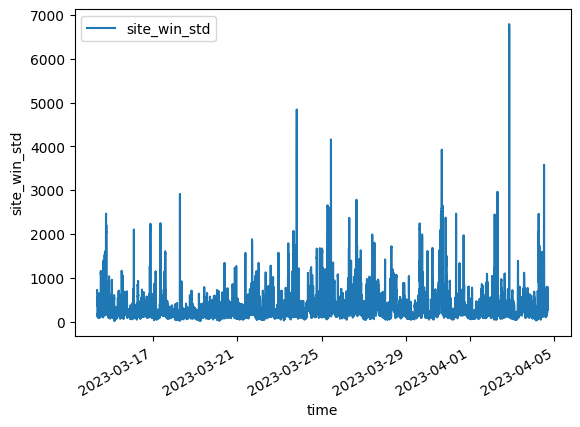

In [161]:
# plot site_win_std
plt.plot(data['date_added'], data['site_win_std'], label="site_win_std")
plt.xlabel("time")
plt.ylabel("site_win_std")
plt.legend()
plt.xticks(rotation=45)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

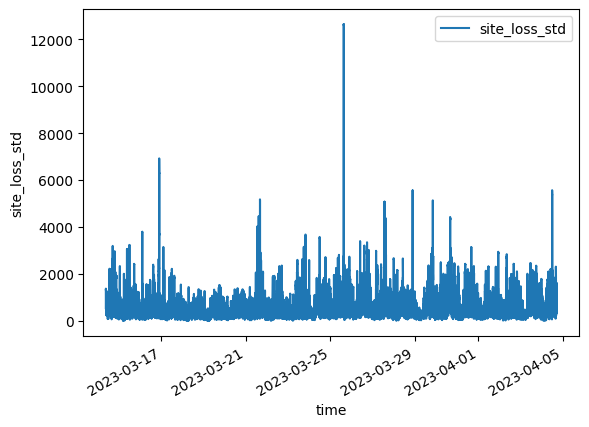

In [162]:
# plot site_loss_std
plt.plot(data['date_added'], data['site_loss_std'], label="site_loss_std")
plt.xlabel("time")
plt.ylabel("site_loss_std")
plt.legend()
plt.xticks(rotation=45)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

<AxesSubplot: >

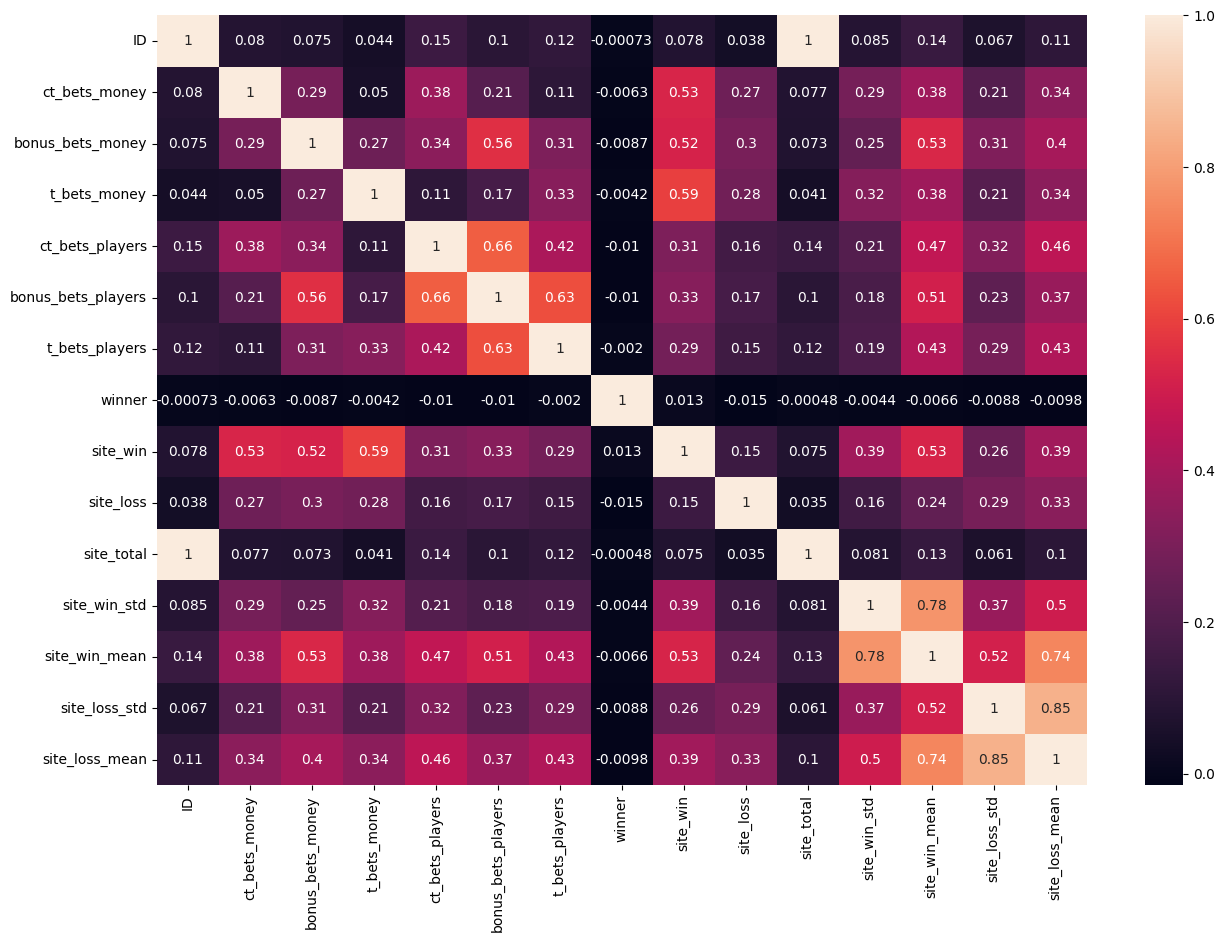

In [163]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), ax=ax, annot=True)

In [164]:
# test to bet on coin with lower pot
def test_bets_amount_win(dataset):
    results = []
    data_bets = []
    for index, row in dataset.iterrows():
        if(row["ct_bets_money"] > row["t_bets_money"]):
            if(row["winner"] == 0.0):
                results.append(1)
                data_bets.append([row["site_win"], row["site_loss"], row["site_win_std"], row["site_win_mean"], row["site_loss_std"], row["site_loss_mean"]])
            else:
                results.append(0)
                
        else:
            if(row["winner"] == 1.0):
                results.append(1)
                data_bets.append([row["site_win"], row["site_loss"], row["site_win_std"], row["site_win_mean"], row["site_loss_std"], row["site_loss_mean"]])
            else:
                results.append(0)
    
    return results, data_bets

# get dataset and sum of bets on lower pot amount
results, data_bets = test_bets_amount_win(data)
data_bets_dataframe = pd.DataFrame(data_bets, columns=["site_win", "site_loss", "site_win_std", "site_win_mean", "site_loss_std", "site_loss_mean"])
print(len(data.index), sum(results), sum(results) / len(data.index))
print()
data_bets_dataframe.info()

62920 29322 0.46602034329307057

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site_win        29322 non-null  float64
 1   site_loss       29322 non-null  float64
 2   site_win_std    29322 non-null  float64
 3   site_win_mean   29322 non-null  float64
 4   site_loss_std   29322 non-null  float64
 5   site_loss_mean  29322 non-null  float64
dtypes: float64(6)
memory usage: 1.3 MB


In [165]:
def bonus_coin_site_analysis(dataset):
    coin_lost = 0
    coin_won = 0
    for index, row in data.iterrows():
        if(row["winner"] == 0.5):
            coin_lost += row["site_loss"]
        else:
            coin_won += row["bonus_bets_money"]
    return coin_won, coin_lost

def t_coin_site_analysis(dataset):
    coin_lost = 0
    coin_won = 0
    for index, row in data.iterrows():
        if(row["winner"] == 0.0):
            coin_lost += row["t_bets_money"]
        else:
            coin_won += row["t_bets_money"]
    return coin_won, coin_lost

def ct_coin_site_analysis(dataset):
    coin_lost = 0
    coin_won = 0
    for index, row in data.iterrows():
        if(row["winner"] == 1.0):
            coin_lost += row["ct_bets_money"]
        else:
            coin_won += row["ct_bets_money"]
    return coin_won, coin_lost
            

coin_won, coin_lost = bonus_coin_site_analysis(data)
print("SITE COINS WON ON BONUS BETS: " + str(round(coin_won, 2)))
print("SITE COINS LOSS ON BONUS BETS: " + str(round(coin_lost, 2)))
coin_won, coin_lost = t_coin_site_analysis(data)
print("SITE COINS WON ON T BETS: " + str(round(coin_won, 2)))
print("SITE COINS LOSS ON T BETS: " + str(round(coin_lost, 2)))
coin_won, coin_lost = ct_coin_site_analysis(data)
print("SITE COINS WON ON CT BETS: " + str(round(coin_won, 2)))
print("SITE COINS LOSS ON CT BETS: " + str(round(coin_lost, 2)))

SITE COINS WON ON BONUS BETS: 12728573.53
SITE COINS LOSS ON BONUS BETS: 11706778.59
SITE COINS WON ON T BETS: 11638285.19
SITE COINS LOSS ON T BETS: 10176110.0
SITE COINS WON ON CT BETS: 10803447.73
SITE COINS LOSS ON CT BETS: 9390583.23


In [166]:
#test for creating dataframe without bonus rolls (will be dropped)
test_without_bonus_bets = data.copy()
test_without_bonus_bets = test_without_bonus_bets.drop(["bonus_bets_players", "bonus_bets_money"], axis=1) # delete columns
test_without_bonus_bets = test_without_bonus_bets.drop(test_without_bonus_bets[test_without_bonus_bets['winner'] == 0.5].index) #delete rows with bonus win

# new calculation of site_win and site_loss due to dropping bonus rolls
test_without_bonus_bets.loc[test_without_bonus_bets['winner'] == 0.0, 'site_win'] = test_without_bonus_bets['ct_bets_money']
test_without_bonus_bets.loc[test_without_bonus_bets['winner'] == 1.0, 'site_win'] = test_without_bonus_bets['t_bets_money']
test_without_bonus_bets.loc[test_without_bonus_bets['winner'] == 0.0, 'site_loss'] = test_without_bonus_bets['t_bets_money']
test_without_bonus_bets.loc[test_without_bonus_bets['winner'] == 1.0, 'site_loss'] = test_without_bonus_bets['ct_bets_money']

# recalculate site_total with only 2 colors
site_total = site_total_calculation(test_without_bonus_bets)
test_without_bonus_bets['site_total'] = site_total

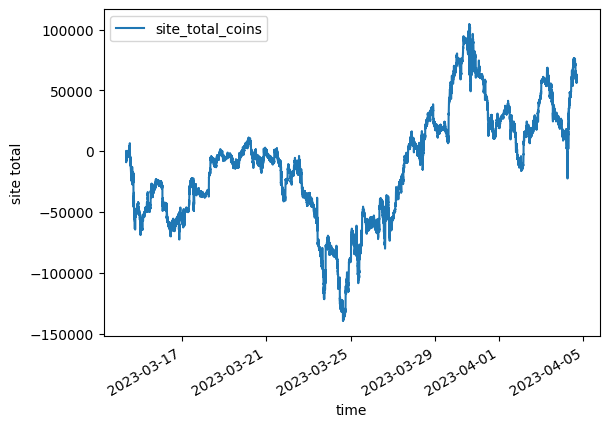

In [167]:
# plot site_win for only 2 colors

plt.plot(test_without_bonus_bets['date_added'], test_without_bonus_bets['site_total'], label="site_total_coins")
plt.xlabel("time")
plt.ylabel("site total")
plt.legend()
plt.xticks(rotation=45)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

<AxesSubplot: >

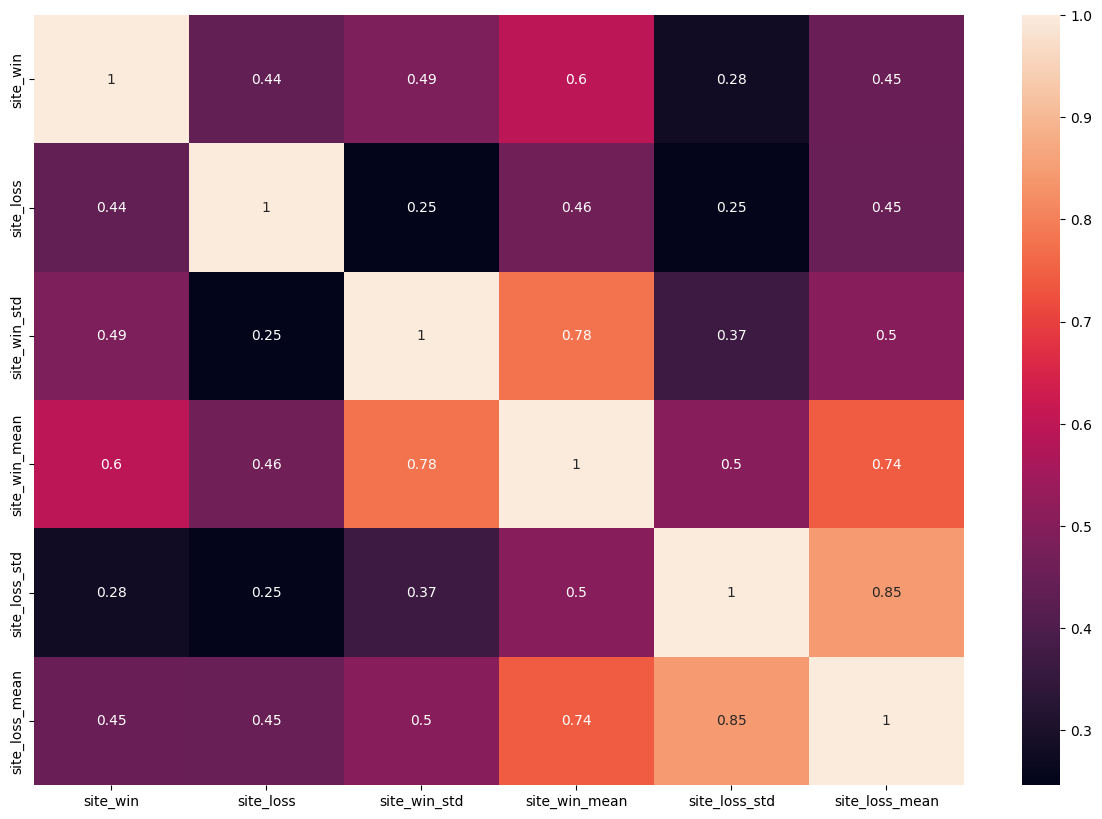

In [168]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_bets_dataframe.corr(), ax=ax, annot=True)

In [169]:
# data = data.drop(['ID', 'date_added', 'ct_bets_players', 'bonus_bets_players', 't_bets_players'], axis=1)
data = data.drop(['ID', 'date_added'], axis=1)

In [170]:
# TEST shift winner attribute
# test_dataframe['winner'] = test_dataframe['winner'].shift(periods=1)
# test_dataframe.dropna(inplace=True)
total_rows = len(data)
split_index = int(total_rows * 0.9)
last_10_percent = data.iloc[split_index:]
data = data.iloc[:split_index]
last_10_percent_results = last_10_percent.pop("winner")

In [171]:
training = data.iloc[:int(data.shape[0]*0.8)]
training_result = training.pop("winner")
testing = data.drop(training.index)
testing_result = testing.pop("winner")

In [172]:
# Normalize the data
normalizer = StandardScaler()
training_norm = normalizer.fit_transform(training)
testing_norm = normalizer.transform(testing)

print(training.shape[1])

13


In [173]:
#build the LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(training.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(128, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(80, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 13, 128)           66560     
                                                                 
 dropout_12 (Dropout)        (None, 13, 128)           0         
                                                                 
 lstm_13 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 80)                10320     
                                                                 
 dense_13 (Dense)            (None, 2)                 162       
                                                                 
Total params: 208,626
Trainable params: 208,626
Non-tr

In [174]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam",
    metrics=["accuracy"],
)

In [175]:
print("\nNOTE: Training begins here:")
model.fit(training, training_result, validation_data=(testing, testing_result), batch_size=64, epochs=20)
# Save model
model.save(f"model_sequential")


NOTE: Training begins here:
Epoch 1/20
708/708 [==============================] - 32s 39ms/step - loss: 0.6926 - accuracy: 0.4662 - val_loss: 0.6904 - val_accuracy: 0.4664
Epoch 2/20
708/708 [==============================] - 24s 34ms/step - loss: 0.6907 - accuracy: 0.4670 - val_loss: 0.6800 - val_accuracy: 0.4918
Epoch 3/20
708/708 [==============================] - 29s 41ms/step - loss: 0.4051 - accuracy: 0.7229 - val_loss: 0.1964 - val_accuracy: 0.8320
Epoch 4/20
708/708 [==============================] - 31s 44ms/step - loss: 0.1815 - accuracy: 0.8419 - val_loss: 0.1374 - val_accuracy: 0.8582
Epoch 5/20
708/708 [==============================] - 27s 38ms/step - loss: 0.1345 - accuracy: 0.8632 - val_loss: 0.1141 - val_accuracy: 0.8731
Epoch 6/20
708/708 [==============================] - 23s 32ms/step - loss: 0.1173 - accuracy: 0.8734 - val_loss: 0.1616 - val_accuracy: 0.8570
Epoch 7/20
708/708 [==============================] - 25s 35ms/step - loss: 0.1065 - accuracy: 0.8800 - val

INFO:tensorflow:Assets written to: model_sequential\assets


INFO:tensorflow:Assets written to: model_sequential\assets


In [176]:
normalizer = StandardScaler()
normalizer.fit(training)
last_10_percent = pd.DataFrame(normalizer.transform(last_10_percent), columns=last_10_percent.columns)
last_10_percent

,ct_bets_money,bonus_bets_money,t_bets_money,ct_bets_players,bonus_bets_players,t_bets_players,site_win,site_loss,site_total,site_win_std,site_win_mean,site_loss_std,site_loss_mean
0,-0.251739,-0.128204,-0.124225,0.554570,0.081457,1.065948,-0.134874,-0.293994,2.773795,-0.291705,0.005493,0.950521,0.860946
1,-0.301857,-0.056646,0.398829,0.188542,0.023253,0.315405,-0.301206,0.062674,2.773569,-0.386736,-0.102590,0.731441,0.442225
2,0.037901,0.452351,-0.148916,0.280049,0.488880,0.221587,0.020437,-0.164321,2.773870,-0.402076,-0.126954,0.733431,0.424290
3,-0.430302,0.073292,0.264919,-0.360499,0.838100,1.535038,0.281045,-0.373937,2.774632,-0.388564,-0.105601,0.741737,0.343418
4,-0.357373,0.180244,0.605717,0.371556,1.012710,1.065948,-0.272218,0.170136,2.774289,-0.504149,-0.204656,0.731932,0.430871
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,-0.413626,0.918271,0.564089,-0.635020,0.197863,2.004127,-0.090342,0.148514,3.540429,0.026636,0.664523,0.943526,1.003142
6288,0.879558,1.197646,-0.455878,-0.726527,0.896303,0.972130,0.464043,4.998741,3.534421,0.020994,0.696574,1.465045,1.798335
6289,0.154260,2.467302,0.118108,-1.001048,1.420133,2.004127,0.829567,-0.083138,3.535212,0.025760,0.703994,1.471867,1.758654
6290,-0.579619,1.537293,-0.269804,0.097035,0.430677,1.628856,-0.031008,-0.284628,3.535630,-0.059616,0.570009,1.153531,1.100607


In [177]:
predictions = model.predict(last_10_percent)
predictions

197/197 [==============================] - 3s 8ms/step


array([[0.99108243, 0.00891756],
       [0.9974395 , 0.00256054],
       [0.9778269 , 0.02217303],
       ...,
       [0.6939945 , 0.30600548],
       [0.9253013 , 0.0746986 ],
       [0.99616003, 0.00383991]], dtype=float32)

In [180]:
def testModel(predictions, targets):
    accuracy=[]
    acuracy90=0
    all90 = 0
    acuracy80=0
    all80 = 0
    acuracy70=0
    all70 = 0
    acuracy60=0
    all60 = 0
    accuracyother=0
    allother = 0
    acc = 0
    
    predicted_throws = 0
    i = targets.shape[0] - 1
    targets = targets.reset_index(drop=True)
    for index, predict in enumerate(predictions):
#         print(predictions[index][0], predictions[index][1], targets[index])
        
        if (predictions[index][0] >= float(0.9) or predictions[index][1] >= float(0.9)):
            all90 += 1
            predicted_throws += 1
        elif (predictions[index][0] >= float(0.8) or predictions[index][1] >= float(0.8)):
            all80 += 1
            predicted_throws += 1
        elif (predictions[index][0] >= float(0.7) or predictions[index][1] >= float(0.7)):
            all70 += 1
            predicted_throws += 1
        elif (predictions[index][0] >= float(0.6) or predictions[index][1] >= float(0.6)):
            all60 += 1
        else:
            allother += 1
            
        if((predictions[index][0] > predictions[index][1]) and targets[index] == float("0.0")) or ((predictions[index][0] < predictions[index][1]) and targets[index] == float("1.0")):
            acc += 1
            
            if (predictions[index][0] >= float(0.9) or predictions[index][1] >= float(0.9)):
                acuracy90 += 1
            elif (predictions[index][0] >= float(0.8) or predictions[index][1] >= float(0.8)):
                acuracy80 += 1
            elif (predictions[index][0] >= float(0.7) or predictions[index][1] >= float(0.7)):
                acuracy70 += 1
            elif (predictions[index][0] >= float(0.6) or predictions[index][1] >= float(0.6)):
                acuracy60 += 1
            else:
                accuracyother += 1
                
#     print(acuracy90, i, acuracy90/i)
            
    print(f"Predicted throws: {predicted_throws}")
    print(f"Accuracy below 90% predictions: {(acuracy90/all90) * 100}%")
    print(f"Accuracy below 80% predictions: {(acuracy80/all80) * 100}%")
    print(f"Accuracy below 70% predictions: {(acuracy70/all70) * 100}%")
    print(f"Accuracy below 60% predictions: {(acuracy60/all60) * 100}%")
    print(f"Accuracy under 60% predictions: {accuracyother/allother}%")
    return acc / i

# test the model
percentCorrect = testModel(predictions, last_10_percent_results)

print(f"Average accuracy: {percentCorrect*100:.2f}%")

0.99108243 0.00891756 1.0
0.9974395 0.0025605385 0.0
0.9778269 0.022173032 1.0
0.9830155 0.016984481 1.0
0.9579376 0.042062417 0.0
0.96818775 0.031812213 0.0
0.9939804 0.0060195834 0.0
0.97703177 0.022968274 1.0
0.9524518 0.047548145 1.0
0.96449673 0.035503276 1.0
0.963388 0.036611933 0.0
0.94165486 0.05834509 1.0
0.95108664 0.048913397 0.0
0.880252 0.11974797 1.0
0.8132632 0.18673678 0.0
0.8788045 0.1211955 0.0
0.91743636 0.082563624 1.0
0.943456 0.05654399 1.0
0.9040487 0.09595134 1.0
0.67133045 0.3286696 1.0
0.6513836 0.34861636 0.0
0.91745704 0.08254295 0.0
0.82936996 0.17062996 0.0
0.6921969 0.30780312 0.0
0.5696753 0.4303247 1.0
0.8123736 0.18762639 0.0
0.8861903 0.113809675 0.0
0.9426241 0.057375945 0.0
0.9227801 0.07721995 0.0
0.583089 0.416911 0.0
0.48873806 0.5112619 1.0
0.6018769 0.39812312 0.0
0.9735233 0.026476737 0.5
0.9584739 0.04152609 1.0
0.972098 0.027902003 0.0
0.8669345 0.13306554 0.5
0.9800647 0.01993535 0.0
0.9765643 0.023435697 0.0
0.9216282 0.078371786 0.0
0.857

In [147]:
data

,ct_bets_money,bonus_bets_money,t_bets_money,ct_bets_players,bonus_bets_players,t_bets_players,winner,site_win,site_loss,site_total,site_win_std,site_win_mean,site_loss_std,site_loss_mean
19,21.59,149.88,1544.13,16,44,28,0.0,171.47,1544.13,8868.69,712.447437,1039.9145,555.278522,596.4800
20,44.84,418.06,1151.98,21,49,28,0.5,1196.82,5434.78,4630.73,712.502153,1054.6180,1204.406554,864.4020
21,799.72,331.51,130.44,19,41,22,1.0,461.95,799.72,4292.96,721.766514,1040.3740,1190.689139,899.9970
22,791.40,366.23,135.46,28,38,21,1.0,501.69,791.40,4003.25,711.165270,1051.3995,1173.073964,938.5335
23,796.63,358.33,71.66,33,37,15,0.0,1154.96,71.66,5086.55,708.473442,1070.3735,1181.725559,925.2250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40785,45.03,40.52,37.22,12,15,13,0.0,85.55,37.22,2292629.50,259.010456,318.1185,293.691376,250.7190
40786,61.28,59.89,123.59,16,18,9,1.0,183.48,61.28,2292751.70,254.969044,300.0850,293.926597,250.3655
40787,86.36,44.50,10.92,13,16,7,1.0,55.42,86.36,2292720.76,253.653667,275.5500,291.758991,253.4380
40788,65.20,46.86,7.67,14,16,11,1.0,54.53,65.20,2292710.09,253.290019,275.9390,287.157627,230.3020
